# Question 3 - Clustering Analysis

The data contains two columns x1 & x2 on which clustering has to be performed.  

## Task
Perform Clustering on the data and find out cluster properties

## Mark Distribution
1. Data Visualization of x1 vs x2 with proper labels and axes
2. Kmeans clustering and visualization of clusters with proper labelling and axes
3. Mean distance of each cluster from the centroid
4. Sum of Square Error (from the mean distance of the cluster) for every cluster
5. One line in every cluster from the centroid to the point having maximum distance 

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [4]:
import pandas as pd
df = pd.read_csv('./data/clustering data.csv')
df.head(12)

,x1,x2
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2
5,3.9,0.4
6,3.4,0.3
7,3.4,0.2
8,2.9,0.2
9,3.1,0.1


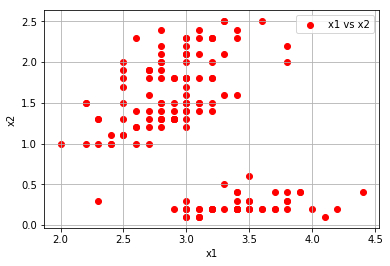

In [5]:
#Data Visualization of x1 vs x2 with proper labels and axes
import matplotlib.pyplot as plt
plt.scatter(df['x1'],df['x2'],color='r',marker='o',label='x1 vs x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()

In [6]:
kmeans=KMeans(n_clusters=2,init='random')

In [7]:
model=kmeans.fit(df)
y_means=model.predict(df)
c=kmeans.cluster_centers_
print('clusters are:',c)
print(y_means)
print(model.inertia_)
model.predict([[4,0.2]])

clusters are: [[3.418 0.244]
 [2.872 1.676]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
36.501


array([0])

Text(0,0.5,'x2')

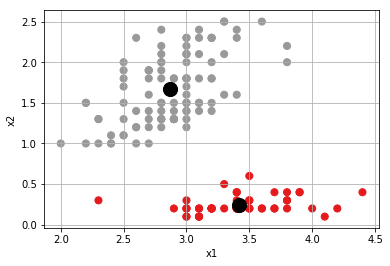

In [8]:
plt.scatter(df['x1'],df['x2'],c=y_means,s=50,cmap='Set1')
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',s=200)
plt.xlabel('x1')
plt.ylabel('x2')

In [9]:
#Mean distance of each cluster from the centroid
c1_centroid=c[0]
c2_centroid=c[1]

cluster1_points=df[y_means==0]
cluster2_points=df[y_means==1]

import numpy as np

c1_distances=cluster1_points.apply(lambda x:np.sqrt((x[0]-c1_centroid[0])**2 +(x[1]-c1_centroid[1])**2),axis=1)
c2_distances=cluster2_points.apply(lambda x:np.sqrt((x[0]-c2_centroid[0])**2 +(x[1]-c2_centroid[1])**2),axis=1)

c1_distances.mean()

0.3164973377229503

In [10]:
c2_distances.mean()

0.4790063238808089

In [12]:
#Sum of Square Error (from the mean distance of the cluster) for every cluster
l=c1_distances.mean()
m=c2_distances.mean()
c1_x=c1_distances.apply(lambda x:(x-l)**2)
c1_x.sum()

c2_distances


50     0.428672
51     0.372236
52     0.288028
53     0.684514
54     0.190158
55     0.382832
56     0.434695
57     0.824476
58     0.377041
59     0.325208
60     1.103340
61     0.217624
62     0.953184
63     0.277417
64     0.377041
65     0.357994
66     0.217624
67     0.697539
68     0.694665
69     0.685682
70     0.350657
71     0.382832
72     0.411534
73     0.481415
74     0.377041
75     0.304237
76     0.285237
77     0.130231
78     0.178213
79     0.728670
         ...   
120    0.704954
121    0.331904
122    0.331904
123    0.212038
124    0.602462
125    0.350657
126    0.143388
127    0.178213
128    0.430070
129    0.148862
130    0.235287
131    0.982934
132    0.528923
133    0.190158
134    0.387505
135    0.636993
136    0.896080
137    0.259538
138    0.178213
139    0.481415
140    0.759052
141    0.664349
142    0.282418
143    0.704954
144    0.928526
145    0.636993
146    0.434235
147    0.348368
148    0.817411
149    0.178213
Length: 100, dtype: floa

In [105]:
c2_y=c2_distances.apply(lambda y:(y-m)**2)
c2_y.sum()

2.6684717607142363

In [106]:
#One line in every cluster from the centroid to the point having maximum distance
print(c1_distances.max())
print(c2_distances.max())
p=[3.418,2.3]
p1=[2.872,2]
q=[0.244,0.3]
q1=[1.676,1]



1.1033403826562318
1.1194016258698218


In [107]:
f=c2_distances.max()
print(f) 
c=0
for i in c2_distances:
    if(i==f):
        print(c)
        break
    c=c+1       
cluster2_points.iloc[41,:]    

1.1194016258698218
41


x1    2.3
x2    0.3
Name: 41, dtype: float64

Text(0,0.5,'x2')

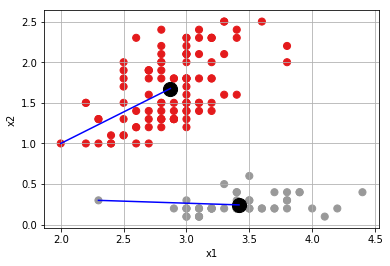

In [108]:
plt.scatter(df['x1'],df['x2'],c=y_means,s=50,cmap='Set1')
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',s=200)
plt.plot(p,q,color='b',linestyle='-')
plt.plot(p1,q1,color='b',linestyle='-')
plt.xlabel('x1')
plt.ylabel('x2')